SINGLE VARIABLE REGRESSION

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/kindersham/100DaysDS/master/Housing%20Prices%20-%20Linear%20Regression/HousingPrices.csv')


In [4]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [3]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


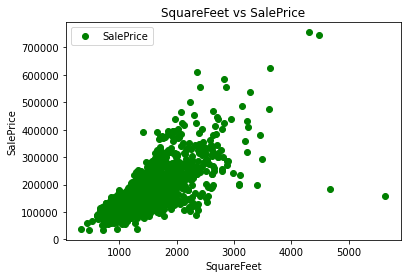

In [9]:
df.plot(x="SquareFeet",y="SalePrice",style='go')
plt.title("SquareFeet vs SalePrice")
plt.xlabel("SquareFeet")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
help(sklearn.linear_model.LinearRegression)

In [10]:
#preprocessing
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
lr=LinearRegression().fit(X_train,y_train)

In [24]:
scores=cross_val_score(lr,X_train,y_train,cv=10,scoring='r2')
print("Mean : ",np.mean(scores),"STD-DEV",np.std(scores))

Mean :  0.5147052949885541 STD-DEV 0.06563558755274343


In [18]:
lr.intercept_

13330.293444921088

In [22]:
lr.coef_

array([110.26434426])

In [26]:
y_pred=lr.predict(X_test)

In [29]:
df=pd.DataFrame(zip(y_test,y_pred),columns=["y_pred","y_test"])
df

,y_pred,y_test
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377
...,...,...
287,324000,202874.701228
288,555000,278185.248358
289,136000,291858.027046
290,82500,91397.449181


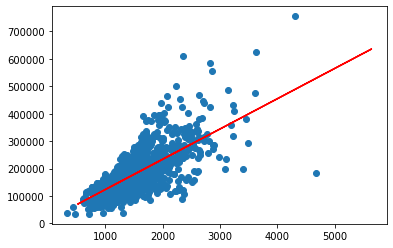

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='red')
plt.show()

In [33]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

39364.76724953735

In [34]:
metrics.mean_squared_error(y_test,y_pred)

3913788296.4027987

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

62560.277304394986

MULTIPLE LINEAR REGRESSION


In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,4]


In [55]:
#handling categrical variables in state so use get_dummies function
states=pd.get_dummies(x,drop_first=True)
x=x.drop('State',axis=1)
x=pd.concat([x,states],axis=1)
x.head()  #like it is encoded now

,R&D Spend,Administration,Marketing Spend,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,142107.34,91391.77,366168.42,1,0


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
model=LinearRegression().fit(x_train,y_train)

In [69]:
y_pred=model.predict(x_test)

In [70]:
res=pd.DataFrame(zip(y_pred,y_test),columns=["y_pred","y_test"])
res

,y_pred,y_test
0,74061.284711,90708.19
1,46009.237988,42559.73
2,99637.263608,103282.38
3,155786.532294,149759.96
4,127636.763495,134307.35
5,192765.185978,192261.83
6,63906.999724,65200.33
7,54935.144159,49490.75
8,84532.352380,81005.76
9,109460.297120,108733.99


In [72]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is==",metrics.mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 socre is  0.9783259006627474
mean_sqrd_error is== 42765360.653041355
root_mean_squared error of is== 6539.522968309031


LOGISTIC REGRESSION


In [ ]:
#sigmoid function


In [73]:
df=pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')

In [74]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [80]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train

In [83]:
#feature scaling
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [85]:
#building model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)


In [86]:
y_pred=model.predict(x_test)

In [87]:
res=pd.DataFrame(zip(y_pred,y_test),columns=["y_pred","y_test"])
res

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
75,0,0
76,1,1
77,0,0
78,1,1


In [89]:
#evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


array([[45,  3],
       [12, 20]])

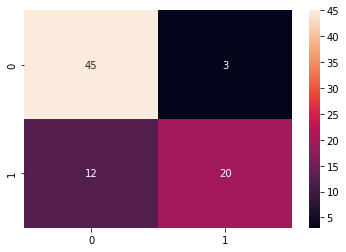

In [90]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

In [91]:
#Findind the accuracy using confusion matrix
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8125
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        48
           1       0.87      0.62      0.73        32

    accuracy                           0.81        80
   macro avg       0.83      0.78      0.79        80
weighted avg       0.82      0.81      0.81        80



MULTICLASS LOGISTIC REGRESSION


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    
X = load_iris().data
Y = load_iris().target

# fit model
model = Multiclass()
model.fit(X, Y)

# plot loss
model.loss_plot()

# predict 
model.predict(X)

# check the predicted value and the actual value
model.predict(X) == Y

In [ ]:
#MNIST DATASET
# https://towardsdatascience.com/softmax-regression-in-python-multi-class-classification-3cb560d90cb2


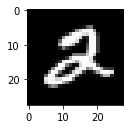

In [112]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(3,5,1)
ax.imshow(x_train[5],cmap=plt.get_cmap('gray'))

In [113]:
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

In [114]:
#one hot encoding
def one_hot(y,c):
  y_hot=np.zeros((len(y),c))
  y_hot[np.arange(len(y)),y]=1 #put 1 for label 
  return y_hot

In [115]:
def softmax(z):
  exp=np.exp(z-np.max(z))
  for i in range(len(z)):
    exp[i]/=np.sum(exp[i])
  return exp

In [116]:
def fit(X, y, lr, c, epochs):

    m, n = X.shape
    w = np.random.random((n, c))
    b = np.random.random(c)
    losses = []
    
    for epoch in range(epochs):
        
        z = X@w + b
        y_hat = softmax(z)
        
        y_hot = one_hot(y, c)
        
        w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
        b_grad = (1/m)*np.sum(y_hat - y_hot)
        
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
        if epoch%100==0:
            print('Epoch {epoch}==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
    return w, b, losses

In [117]:
x_train=x_train/255
w,b,l=fit(x_train,y_train,lr=0.9,c=10,epochs=1000)


Epoch 0==> Loss = 4.777763879707235
Epoch 100==> Loss = 0.40419168658519344
Epoch 200==> Loss = 0.35543136695158606
Epoch 300==> Loss = 0.33384057573819237
Epoch 400==> Loss = 0.32089034664862065
Epoch 500==> Loss = 0.3119711177137605
Epoch 600==> Loss = 0.30531070825026013
Epoch 700==> Loss = 0.300066610980189
Epoch 800==> Loss = 0.29578166384193444
Epoch 900==> Loss = 0.2921837456189785


In [118]:
def predict(X, w, b):
    
    # X --> Input.
    # w --> weights.
    # b --> bias.
    
    # Predicting
    z = X@w + b
    y_hat = softmax(z)
    
    # Returning the class with highest probability.
    return np.argmax(y_hat, axis=1)

In [119]:
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)

In [120]:
# Accuracy for training set.
train_preds = predict(x_train, w, b)
accuracy(y_train, train_preds)


0.9198833333333334

In [121]:
x_test = x_test/255
test_preds = predict(x_test, w, b)
accuracy(y_test, test_preds)

0.9181

In [126]:
fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title('y: {y}/ y_hat: {y_hat}'.format(y=y_test[i], y_hat=test_preds)
    plt.axis('off'


SyntaxError: ignored

NAIVE BAYES CLASSIFIER

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

NEURAL NETWORKS

In [127]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 2s 3ms/step - loss: 2.1130 - accuracy: 0.5547
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7471 - accuracy: 0.6419
Epoch 3/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.6497
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6523
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6523
Epoch 6/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.6484
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6576
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6576
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6510
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6549
Epoch 11/

SENTIMENT ANALYSIS (with NLP)